# Họ và tên: Trần Thuận Phát
# MSSV: 21127666

In [1]:
import numpy as np
import random
import pandas as pd 
from keras.datasets import mnist     
from keras import utils  
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


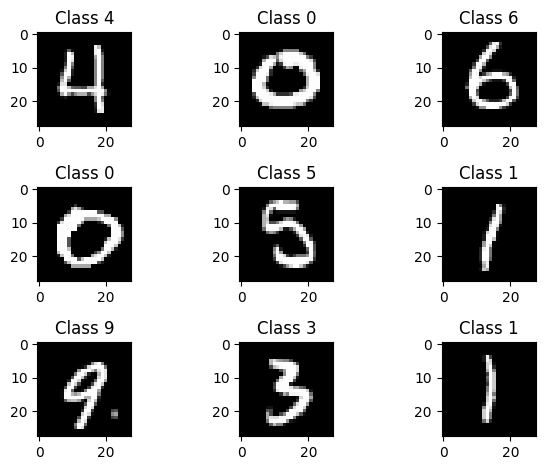

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

# DATA PROCESSING

In [5]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# Convert to one-hot encoding

In [6]:
no_classes = 10

Y_train = utils.to_categorical(y_train, no_classes)
Y_test = utils.to_categorical(y_test, no_classes)

# Plot Digits

In [7]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Digit:{np.argmax(Y[i])}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

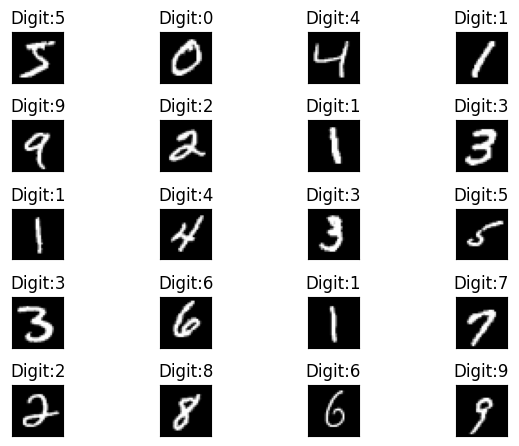

In [8]:
plot_digits(X_train, Y_train)

# Lenet5 Model

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_model = model.fit(X_train.reshape(X_train.shape[0], 28, 28, 1), Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test))

Epoch 1/10
469/469 [==============================] - 42s 88ms/step - loss: 0.1877 - accuracy: 0.9427 - val_loss: 0.0458 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 41s 86ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0313 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0268 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0302 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0276 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0318 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 7/10
469/469 [==============================] - 40s 

In [13]:
score = model.evaluate(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test, batch_size=32)
print(score)

313/313 [==============================] - 2s 8ms/step - loss: 0.0325 - accuracy: 0.9905


# Evaluate the model

In [15]:
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9904999732971191


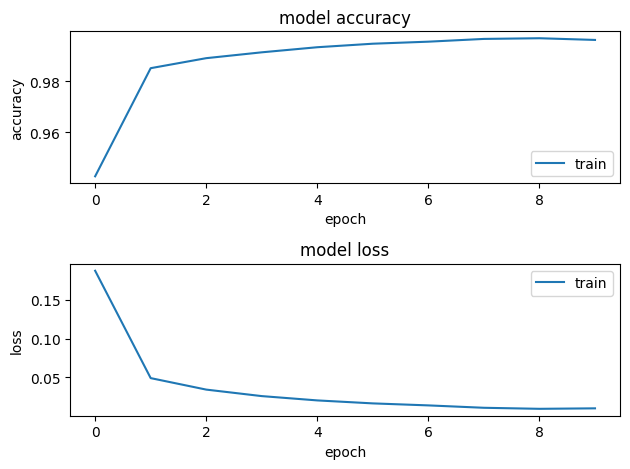

In [16]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [17]:
predicted_classes = model.predict(X_test.reshape(X_test.shape[0], 28, 28, 1))
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 3s 9ms/step


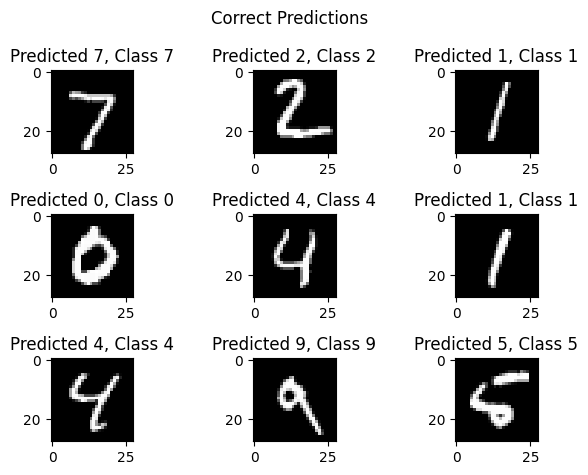

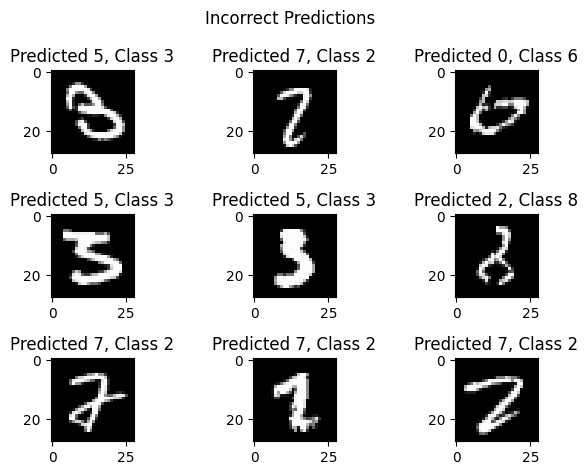

In [18]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()